# Pearson's $\chi^2$ Test

Let's revisit Tommy, the cheating bastard he is. Last time we tried to answer the question *"Is Tommy rolling too many sixes?"*.

Now, time to ask a different question. What if we're not worried about just the number of sixes, but what to ask *"Is the distribution of rolls we get consistent with a fair die?"*

The Pearson's $\chi^2$ test for rolling a die gives

$$ \chi^2 = \sum_{i=1}^{6} \frac{(C_i - E_i)^2}{E_i} $$

But what does this $\chi^2$ value mean? We can convert it to a probability given the $\chi^2$ distribution, with 5 degrees of freedom (six sides - 1)

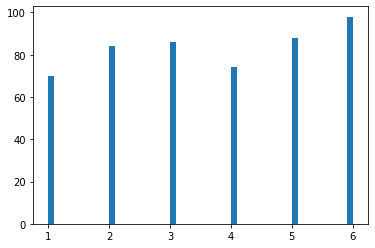

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data\loaded_500_2.txt")
unique, counts = np.unique(data, return_counts=True)
plt.hist(data, bins=50);

In [2]:
expected = data.size / 6
chi2_val = np.sum((counts - expected)**2 / expected)
print(chi2_val)

6.112


Our p-value is 0.295


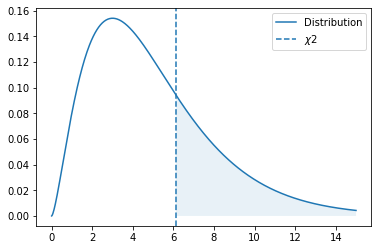

In [3]:
from scipy.stats import chi2
chi2s = np.linspace(0, 15, 500)
prob = chi2.pdf(chi2s, 5)

plt.plot(chi2s, prob, label="Distribution")
plt.axvline(chi2_val, label="$\chi2$", ls="--")
plt.fill_between(chi2s, prob, 0, where=(chi2s>=chi2_val), alpha=0.1)
plt.legend();
print(f"Our p-value is {chi2.sf(chi2_val, 5):.3f}")

In [4]:
from scipy.stats import chisquare
chisq, p = chisquare(counts, expected)
print(f"We have a chi2 of {chisq:.2f} with a p-value of {p:.3f}")

We have a chi2 of 6.11 with a p-value of 0.295


This leads to an interesting point. In the first test with only number of sixes, we had significance. In the last test, we only care about the occurence of sixes. In this example, our statistical power was spread out over many faces. Both tests are valid. Be careful about finding many ways to test a hypothesis - this is called "significance hunting".

In general, the more specific your "question", the more powerful a test you can use.

Also, whilst in this example we used a one-sided distribution (which is asking the question if our observed distrubition is *too discrepant* from the underlying), we could also use a two-sided distribution, which also tests to see if our observed distribution is *too similar* from the underlying. For example, imagine rolling a dice 600 times and getting exactly. 100 of each number. And then getting that result when you do it again and again. With random numbers, there is such a thing as being too perfect.